# Complete Statistics

### Preparation

In [3]:
 # Standard Dependencies
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from statistics import median
from scipy import signal
from scipy.special import factorial
import scipy.stats as stats
from scipy.stats import sem, binom, lognorm, poisson, bernoulli, spearmanr
from scipy.fftpack import fft, fftshift
from scipy.stats import pareto


# Scikit-learn for Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read in csv of Toy Dataset
df = pd.read_csv('toy_dataset.csv')

In [5]:
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367,No
1,2,Dallas,Male,54,45084,No
2,3,Dallas,Male,42,52483,No
3,4,Dallas,Male,40,40941,No
4,5,Dallas,Male,46,50289,No


## Discrete and Continous Variables
* A **Discrete variable** is a variable that can only take on a certain number of values. If you
 can count a set of items, then it’s a discrete variable. An example of a discrete variable
 is the outcome of a dice. It can only have 1 of 6 different possible outcomes and is
 therefore discre
* A **continuous variable** can take on an infinite number of values. An example of a
 continuous variable is length. Length can be measured to an arbitrary degree and is
 there continuou
*  In statistics we represent a distribution of **discrete variables** with **PMF's (Probability
 Mass Functions** and ** CDF's (Cumulative Distribution Functions**). We represent
 distributions o**f continuous variabl**es wit**h PDF's (Probability Density Function**s) and
 CDF

1. The **PFM** defines the probability of all possible values x of the random variable.
2.  A **PDF**  is the same but for continuous values
3.   The** CD**F represents the probability that th 
 random variable X will have an outcome less or equal to the value x. The name CDF is
 used for both discrete and continuous distriutio
#### PMF (Probability Mass Function)
 Here we visualize a PMF of a binomial distribution. You can see that the possible values
 are all intege.s. For example, no values are between 50 and 51.
 The PMF of a binomial distribution in funct is:

 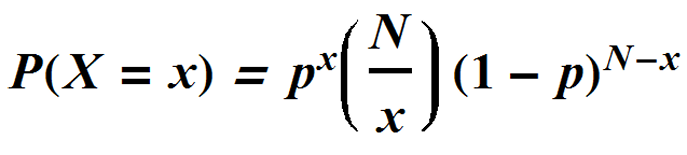
 ormns.'s.s.te.

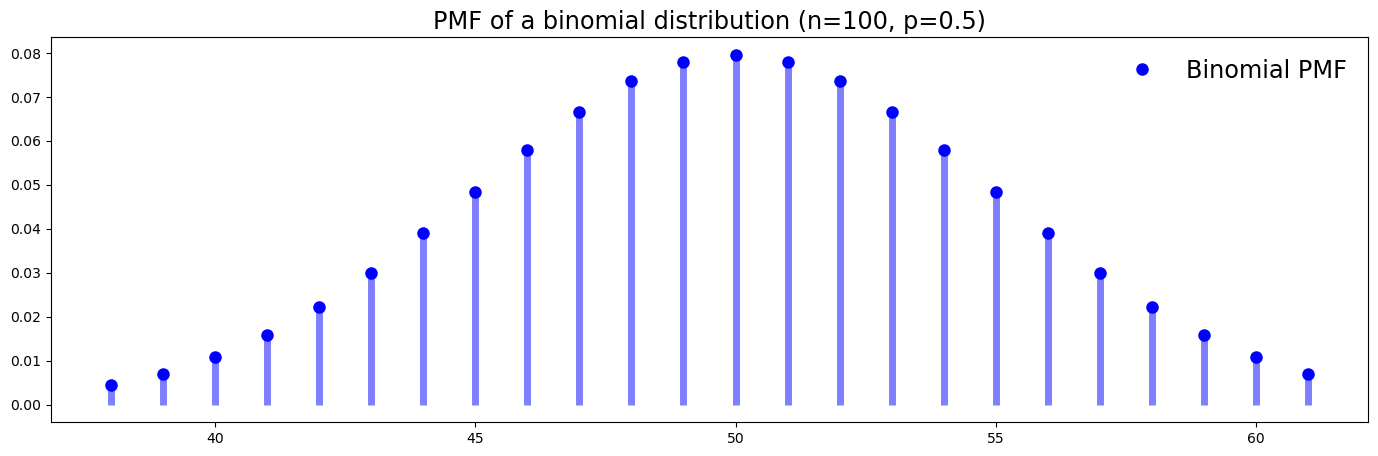

In [7]:
# PMF Visualization
# Set parameters for binom distribution
n = 100 # no. of trials
p = 0.5 # probability of sucesss

fig, ax = plt.subplots(1, 1, figsize=(17,5))

# Find the first and 99th percentile
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))

# Plot the PMF
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='Binomial PMF')

# Add verticle line for each X
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p) # Frozen binomial distribution

#ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen PM')
ax.legend(loc='best', frameon=False, fontsize='xx-large')
plt.title('PMF of a binomial distribution (n=100, p=0.5)', fontsize='xx-large')
plt.show()

### PDF (Probability Density Functions)
The **PDF** is the same as a PMF, but continuous. It can be said that the distribution has
an infinite number of possible values. Here we visualize a standard normal distribution
with a mean of 0 and standard deviation of 1.

PDF of a normal distribution in formula form:
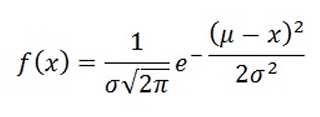


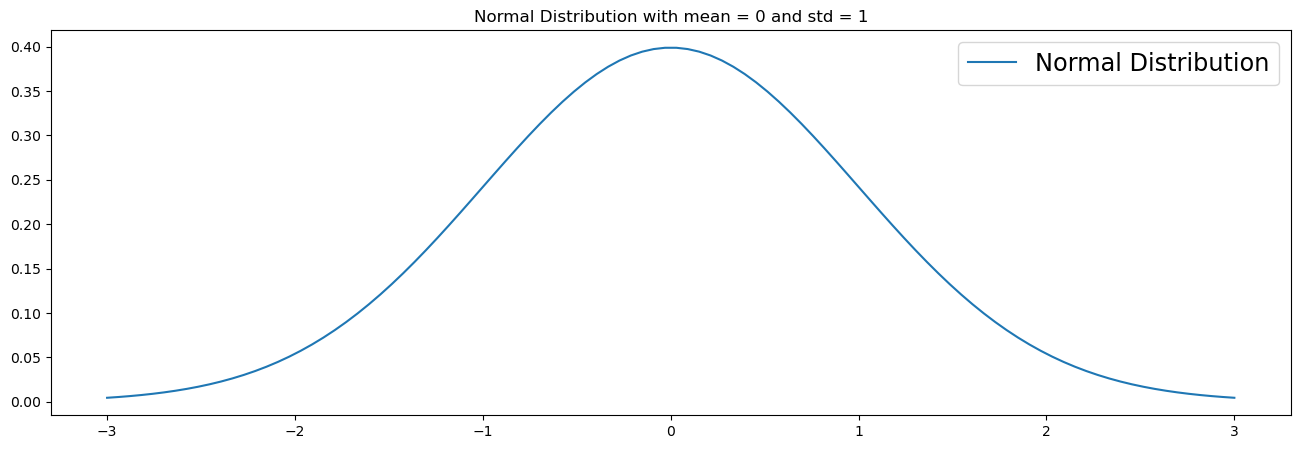

In [9]:
# set parameters for normal distributions
mu = 0 # mean
variance = 1 # Variance
sigma = sqrt(variance) # std

# Take 100 values between 3 std left to 3 std right
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.figure(figsize=(16,5))
plt.plot(x, stats.norm.pdf(x, mu, sigma), label="Normal Distribution")

plt.title('Normal Distribution with mean = 0 and std = 1')
plt.legend(fontsize='xx-large')
plt.show()

###  CDF (Cumulative Distribution Function)
 The **CDF** maps the probability that a random variable X will take a value of less than or
 equal to a value x (P(X ≤ x)). CDF's can be discrete or continuous. In this section we
 visualize the continuous case. You can see in the plot that the CDF accumulates all
 probabilities and is therefore bounded between 0 ≤ x ≤ 1.
 
 The CDF of a normal distribution as a formula:

 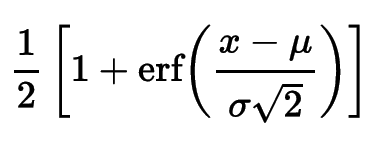

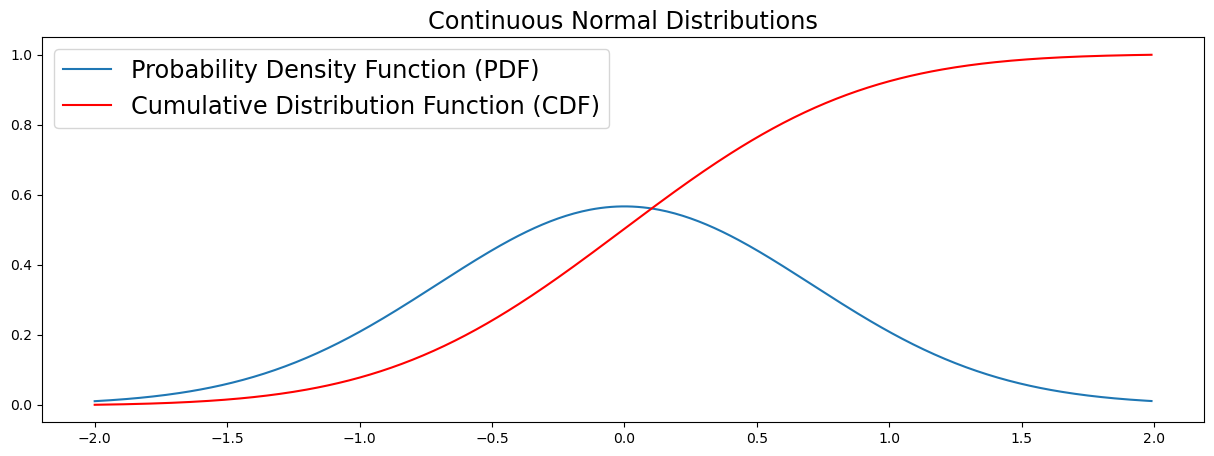

In [19]:
X = np.arange(-2, 2, 0.01)
Y = exp(-X**2)

# Normalise the data to make total are aunder curve 1
Y = Y/(0.01*Y).sum()

# Plot the PDF and CDF
plt.figure(figsize=(15,5))
plt.title('Continuous Normal Distributions', fontsize='xx-large')
plot(X, Y, label='Probability Density Function (PDF)')
plot(X, np.cumsum(Y * 0.01), 'r', label='Cumulative Distribution Function (CDF)')
plt.legend(fontsize='xx-large')
plt.show()



# Distributions
* A probability distribution is a mathematical function that describes the likelihood (or probability) of different outcomes for a random variable. It tells us how likely each possible value of the random variable is.
* A random variable (X) is essentially a function that assigns a real number to each possible outcome of a random experiment. It "maps" events to numerical values
* Discrete distributions are visualized as bar plots, while continuous distributions are visualized as smooth curves.
*  The visualizations in this section are of discrete distributions. Many of these
 distributions can however also be continuou

### 1. Uniform Distribution
A **uniform distribution** is a type of probability distribution where every event has the same probability of occurring. This is true for both discrete and continuous random variables.
 Therefore, the distribution consists of random values with no patterns in
 the

. In this example we generate random floating numbers between 0 and1
 The PDF of a Uniform Distribut


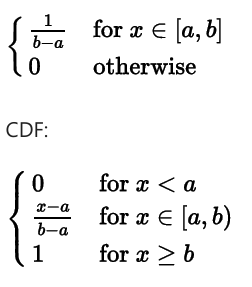ions

In [22]:
# Uniform distribution (between 0 and 1)
uniform_dist = np.random.random(1000)
uniform_df = pd.DataFrame({'value' : uniform_dist})
uniform_dist = pd.Series(uniform_dist)
uniform_df.head()

,value
0,0.169773
1,0.790186
2,0.709734
3,0.481057
4,0.345090


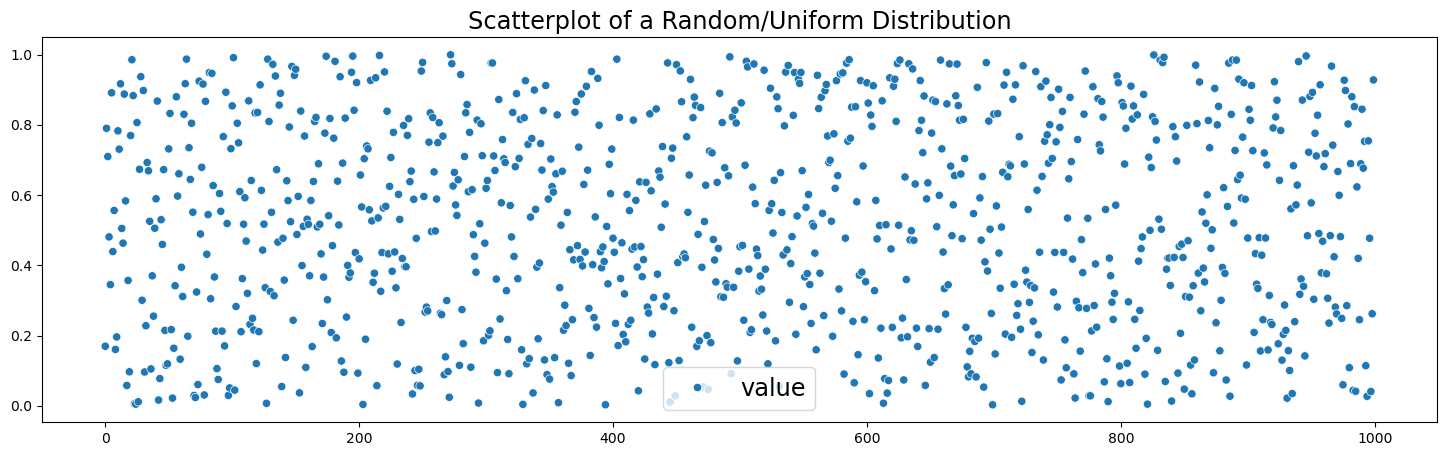

In [24]:
# Plot
plt.figure(figsize=(18,5))
sns.scatterplot(data=uniform_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Random/Uniform Distribution', fontsize='xx-large')
plt.show()

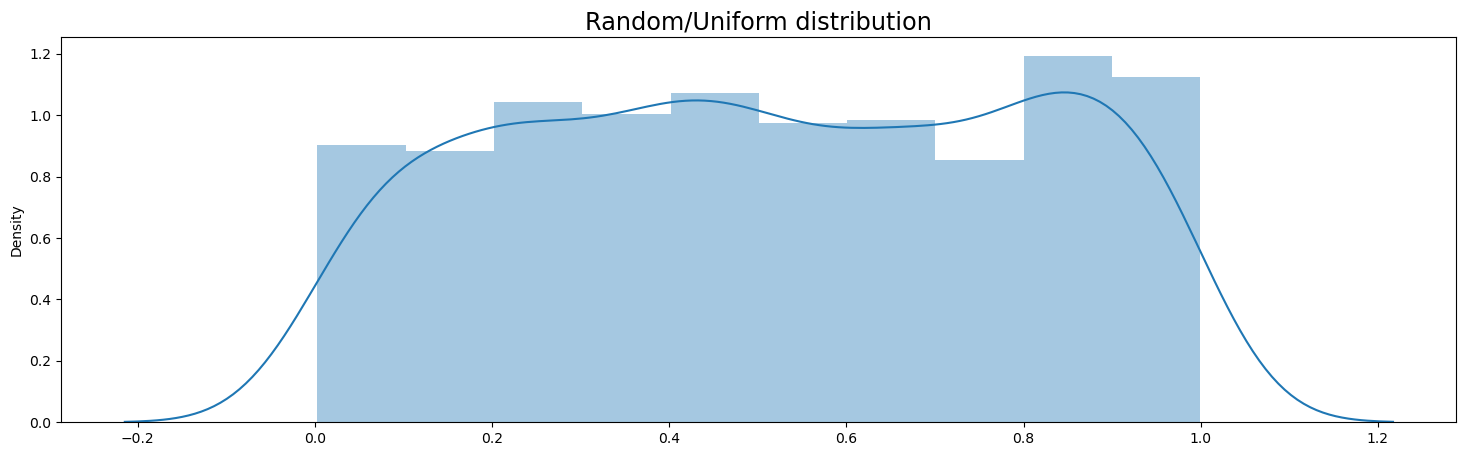

In [25]:
plt.figure(figsize=(18,5))
sns.distplot(uniform_df)
plt.title('Random/Uniform distribution', fontsize='xx-large')
plt.show()

### 2. Normal Distribution
A **normal distribution** (also called Gaussian or Bell Curve) is very common and
 convenient. This is mainly because of the Central Limit Theorem (CLT), which states that
 with a large amount of independent random variables (like coin flips) the distribution
 tends towards a normal distribution.

 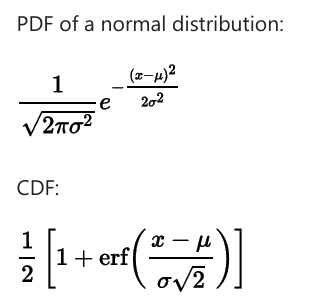

In [29]:
# Generate Normal Distribution
normal_dist = np.random.randn(10000)
normal_df = pd.DataFrame({'value' : normal_dist})
normal_dist = pd.Series(normal_dist)

normal_dist2 = np.random.randn(10000)
normal_df2 = pd.DataFrame({'value' : normal_dist2})
normal_dist2 = pd.Series(normal_dist)

normal_df_total = pd.DataFrame({'value1' : normal_dist, 
'value2' : normal_dist2})

normal_df_total.head()

,value1,value2
0,0.689914,0.689914
1,-0.564698,-0.564698
2,0.901468,0.901468
3,0.261318,0.261318
4,1.594806,1.594806


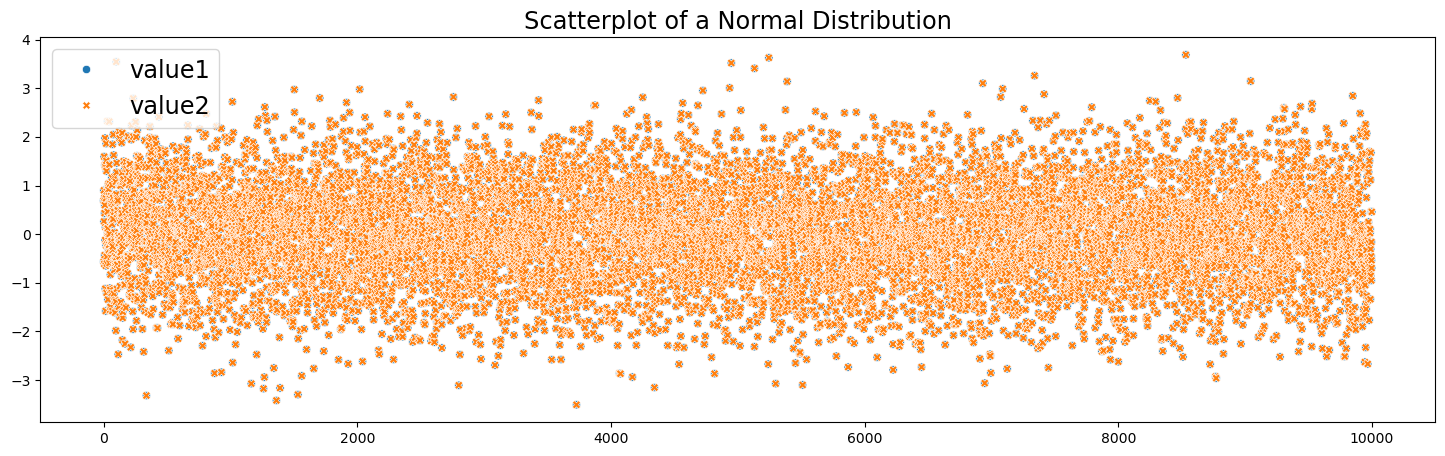

In [31]:
# Scatterplot
plt.figure(figsize=(18,5))
sns.scatterplot(data=normal_df_total)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Normal Distribution', fontsize='xx-large')
plt.show()

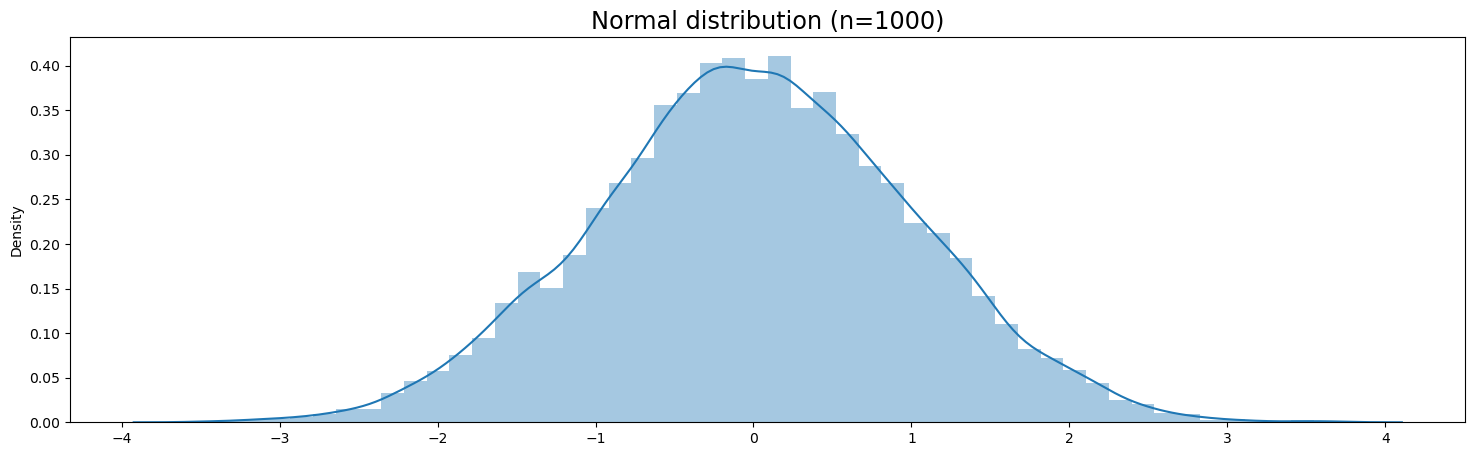

In [32]:
# Normal Distribution as a Bell Curve
plt.figure(figsize=(18,5))
sns.distplot(normal_df_total)
plt.title('Normal distribution (n=1000)', fontsize='xx-large')
plt.show()

### 3.  Binomial Distribution
A Binomial Distribution describes the probability of having exactly k successes in n independent trials, where each trial has two possible outcomes: success or failure.

**Binomial distributions** must meet the following three criteria
1. The number of observations or trials is fixed. In other words, you can only figure
out the probability of something happening if you do it a certain number of times.
2. Each observation or trial is independent. In other words, none of your trials have
an effect on the probability of the next trial.
3. The probability of success is exactly the same from one trial to another.

An intuitive explanation of a binomial distribution is flipping a coin 10 times. If we have a fair coin our chance of getting heads (p) is 0.50. Now we throw the coin 10 times and
 count how many times it comes up heads. In most situations we will get heads 5 times
 but there is also a change that we get heads 9 times. The PMF of a binomil
 distribution will give these probabilities if we say N = 10 and p = 0.5. We say that th x
 for heads is 1 and 0 for t

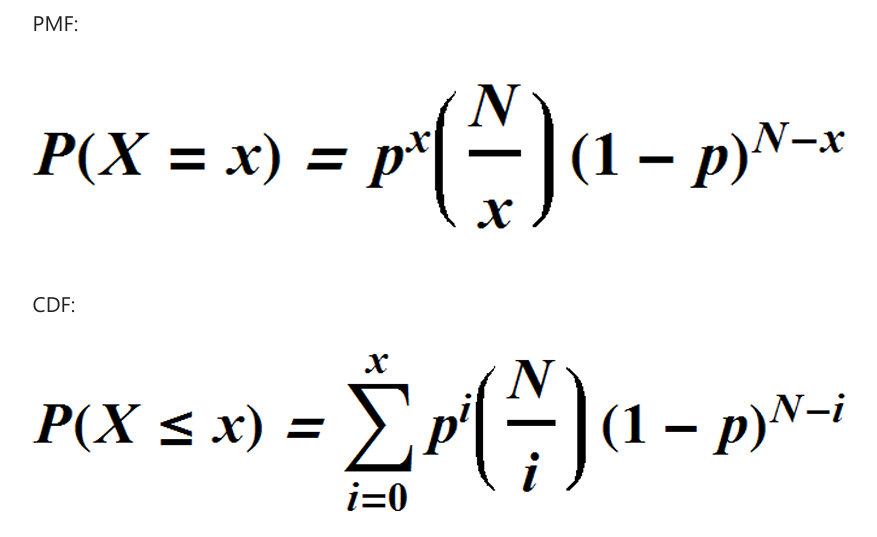

A **Bernoulli Distribution** is a special case of a Binomial Distribution. All values in a Bernoulli Distribution are either 0 or 

For example, if we take an unfair coin which falls on heads 60 % of the time, we can describe the Bernoulli distribution as follows:
 p (change of heads) = 0.
 1 - p (change of tails) = 04
 heads  1
 tails= 0
 Formally, we can describe a Bernoulli distribution with the following PMF (Probablity
 Mass Fun


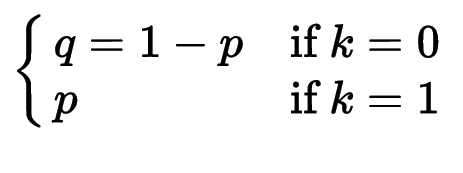orial.ipyn1
ails.

In [34]:
# Generating Bernoulli trials with p=0.6 and n=1000
p = 0.6
n = 1000
bern_values = pd.Series(np.random.binomial(1, p, n))
bern_values

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    1
997    1
998    1
999    1
Length: 1000, dtype: int32

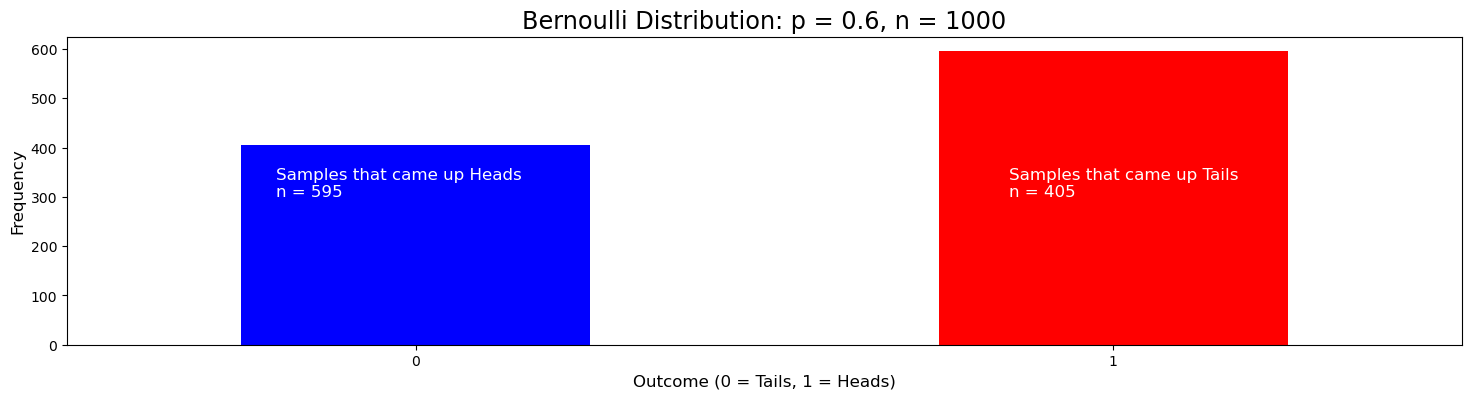

In [35]:
# Plotting the distribution
plt.figure(figsize=(18, 4))
bern_values.value_counts().sort_index().plot(kind='bar', rot=0, color=['blue', 'red'])

# Adding annotations for heads and tails
plt.annotate(
    'Samples that came up Tails\nn = {}'.format(bern_values[bern_values == 0].count()), 
    xy=(0.85, 300), 
    fontsize='large', 
    color='white'
)
plt.annotate(
    'Samples that came up Heads\nn = {}'.format(bern_values[bern_values == 1].count()), 
    xy=(-0.2, 300), 
    fontsize='large', 
    color='white'
)

# Title and labels
plt.title('Bernoulli Distribution: p = 0.6, n = 1000', fontsize='xx-large')
plt.xlabel('Outcome (0 = Tails, 1 = Heads)', fontsize='large')
plt.ylabel('Frequency', fontsize='large')

# Show the plot
plt.show()


### 4.  Poisson Distribution
The **Poisson distribution** is a discrete probability distribution that describes the number of events occurring in a fixed interval of time or space, given that these events happen with a known constant mean rate and independently of the time since the last event.

The Poisson distribution is a discrete distribution and is popular for modelling the
number of times an event occurs in an interval of time or space.
It takes a value lambda, which is equal to the mean of the distribution

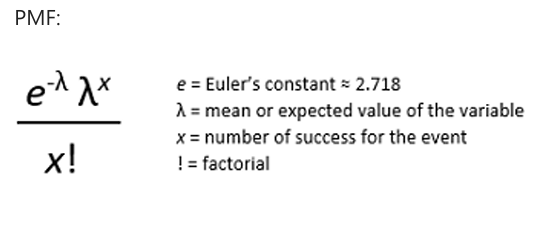



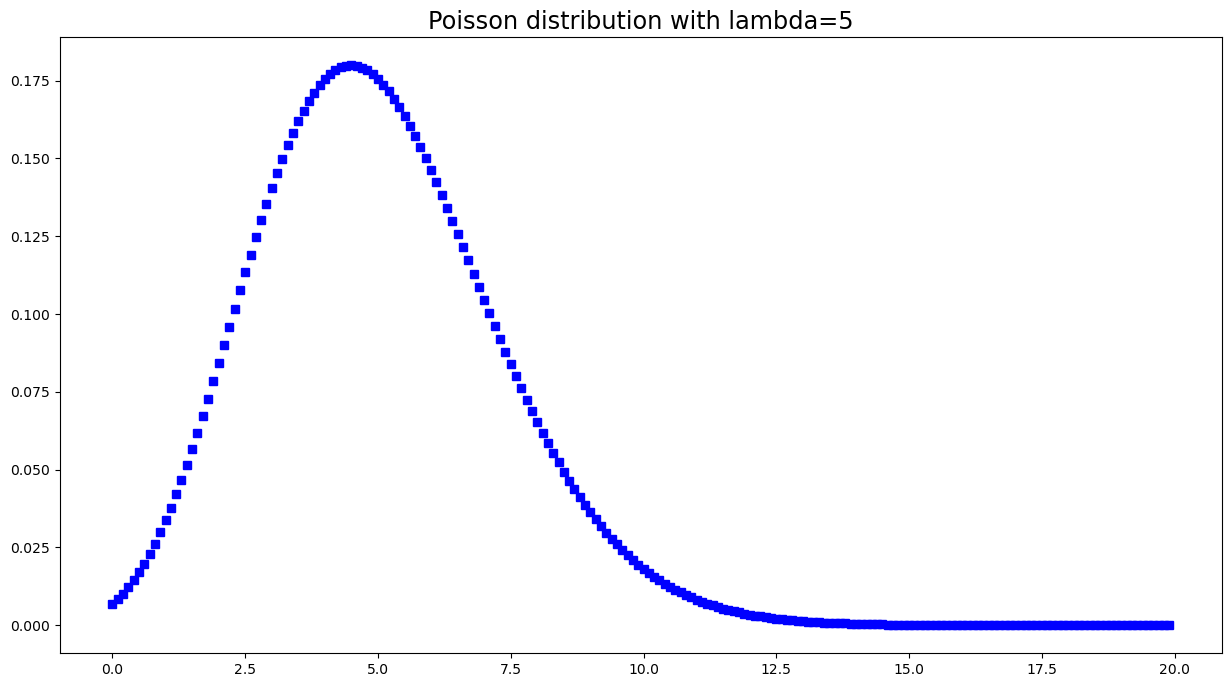

In [37]:
x = np.arange(0, 20, 0.1)
y = np.exp(-5)*np.power(5,x)/factorial(x)


plt.figure(figsize=(15,8))
plt.title('Poisson distribution with lambda=5', fontsize='xx-large')
plt.plot(x, y,'bs')
plt.show()

### 5. Log-Normal Distribution
The **log-normal** distribution is a probability distribution of a random variable whose logarithm is normally distributed. In simpler terms, if a variable 
𝑋
X is log-normally distributed, then 
ln
⁡
(
𝑋
)
ln(X) (the natural logarithm of 
𝑋
X) follows a normal distribution.

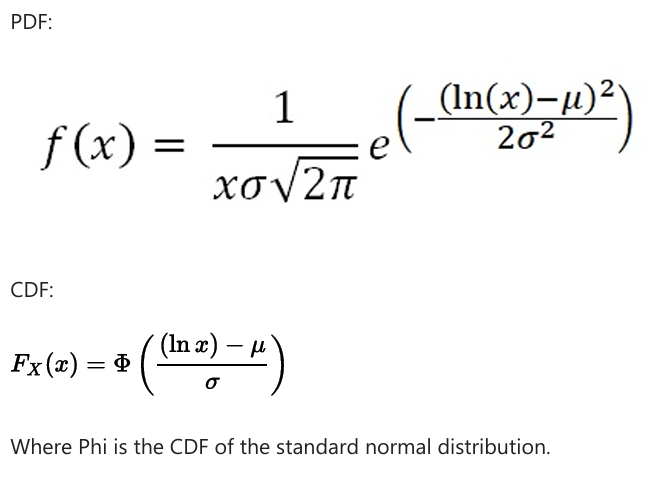

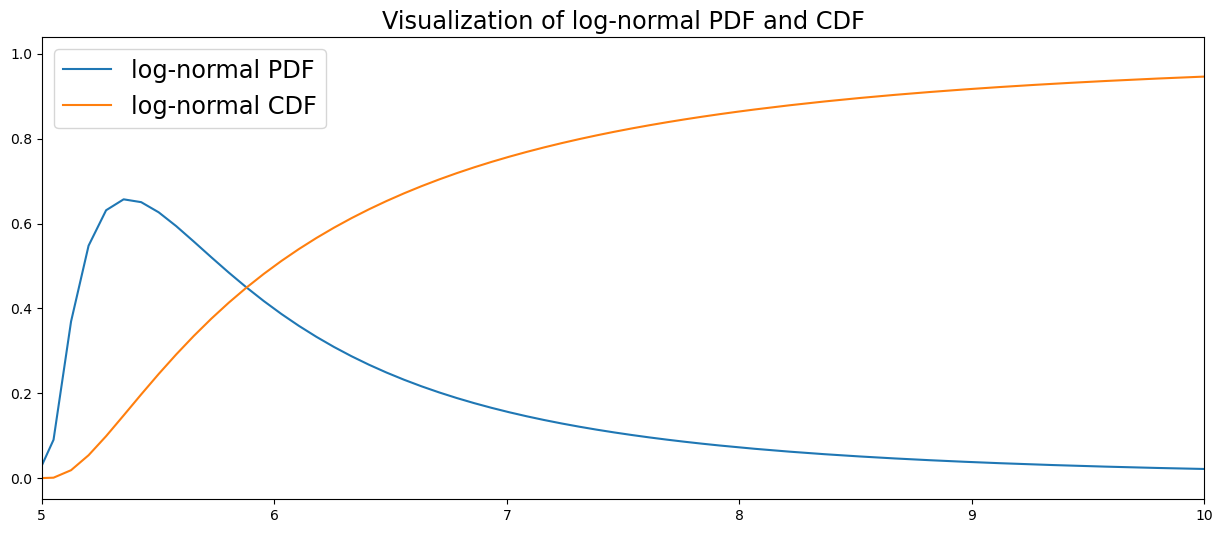

In [39]:
# Specify standard deviation and mean
std = 1
mean = 5

# Create log-normal distribution
dist=lognorm(std,loc=mean)
x=np.linspace(0,15,200)

# Visualize log-normal distribution
plt.figure(figsize=(15,6))
plt.xlim(5, 10)
plt.plot(x,dist.pdf(x), label='log-normal PDF')
plt.plot(x,dist.cdf(x), label='log-normal CDF')
plt.legend(fontsize='xx-large')
plt.title('Visualization of log-normal PDF and CDF', fontsize='xx-large')
plt.show()

### 6. Pareto Distributions
The **Pareto distribution** is a continuous probability distribution that is used to model data where a small number of occurrences account for a large proportion of the effect. It’s often referred to as the 80-20 rule (the Pareto principle), which states that approximately 80% of effects come from 20% of the causes. This distribution is often used to model wealth distribution, income distribution, and the size of cities, among others.

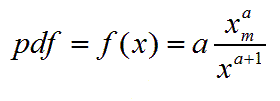

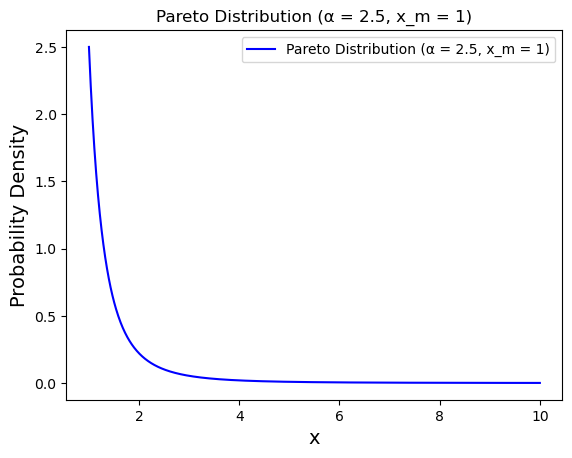

In [41]:
# Parameters
alpha = 2.5  # shape parameter 
x_m = 1      # scale parameter 

x = np.linspace(x_m, 10, 1000)

# Probability Density Function (PDF) of the Pareto distribution
pdf_values = pareto.pdf(x, alpha, scale=x_m)

# Plotting the Pareto Distribution
plt.plot(x, pdf_values, label=f'Pareto Distribution (α = {alpha}, x_m = {x_m})', color="blue")

# Adding labels and title
plt.title(f'Pareto Distribution (α = {alpha}, x_m = {x_m})')
plt.xlabel('x', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.legend(loc='best')
plt.show()


## Descriptive Stastics
* Measures of central Tendancy
**Mean ,Median and Mode**
  * Note: mean is also called first moment
  
  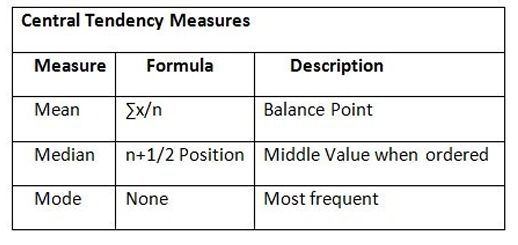

#### Moments
A **moments** are specific statistical measures that describe the shape and characteristics of a distribution. They give important information about the distribution’s central tendency, spread, skewness, and kurtosis
1. First Moment **Mean(expected Value)**: The mean of a distribution is the first moment and gives the central location of the data.
   
2. Second Moment **Variance (Spread):**  The average of the squared distance of the mean. Variance is interesting in
 a mathematical sense, but the standard deviation is often a much better measure of
 how spread out the distribution .

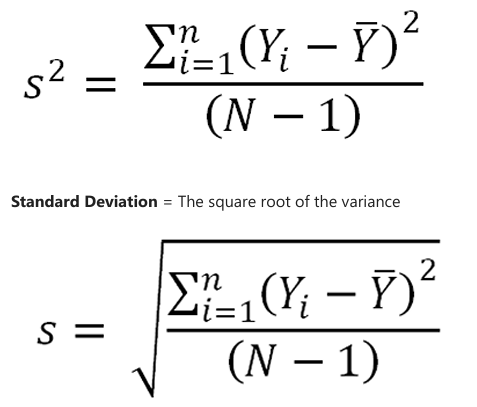

3. Third Moment **Skewness (Asymmetry):** A measure that describes the contrast of one tail versus the other tail. For
 example, if there are more high values in your distribution than low values then your
 distribution is 'skewed' towards the high value

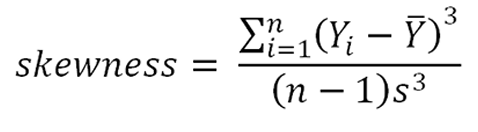

4. Fourth Moment **Kurtosis (Peakedness):** Kurtosis measures the "tailedness" of the distribution. A higher kurtosis indicates more data points in the tails, and a lower kurtosis suggests less.

   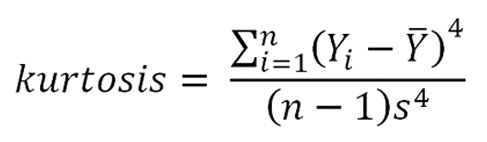
   s.is

In [58]:
# Summary
print('Summary Statistics for a normal distribution: ')

# Median
medi = median(normal_dist)
print('Median: ', medi)
display(normal_df.describe())

# Standard Deviation
std = sqrt(np.var(normal_dist))
print('The first four calculated moments of a normal distribution: ')

# Mean
mean = normal_dist.mean()
print('Mean: ', mean)

# Variance
var = np.var(normal_dist)
print('Variance: ', var)

# Return unbiased skew normalized by N-1
skew = normal_df['value'].skew()
print('Skewness: ', skew)

# Return unbiased kurtosis over requested axis using Fisher’s definition of ku
# (kurtosis of normal == 0.0) normalized by N-1
kurt = normal_df['value'].kurtosis()
print('Kurtosis: ', kurt)

Summary Statistics for a normal distribution: 
Median:  -0.0038515790361064624


,value
count,10000.000000
mean,0.001432
std,1.001787
min,-3.508576
25%,-0.659920
50%,-0.003852
75%,0.679538
max,3.689478


The first four calculated moments of a normal distribution: 
Mean:  0.0014315215036316204
Variance:  1.0034767720104332
Skewness:  -0.00620423841409312
Kurtosis:  -0.0816684966047796


### Bias, MSE and SE
**Bias** is a measure of how far the sample mean deviates from the population mean. The
 sample mean is also called Expected value.
 Formula for Bias:

 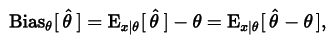

*  The formula for expected value (EV) makes it apparent that the bias can also be
 formulated as the expected value minus the population mean



In [61]:
# Take sample
normal_df_sample = normal_df.sample(100)

# Calculate Expected Value (EV), population mean and bias
ev = normal_df_sample.mean()[0]
pop_mean = normal_df.mean()[0]
bias = ev - pop_mean

In [64]:
print('Sample mean (Expected Value): ', ev)
print('Population mean: ', pop_mean)
print('Bias: ', bias)

Sample mean (Expected Value):  -0.017078211744651652
Population mean:  0.0014315215036316204
Bias:  -0.018509733248283273


###  MSE (Mean Squared Error) 
MSE is a formula to measure how much estimators deviate
from the true distribution. This can be very useful with for example, evaluating
regression models.

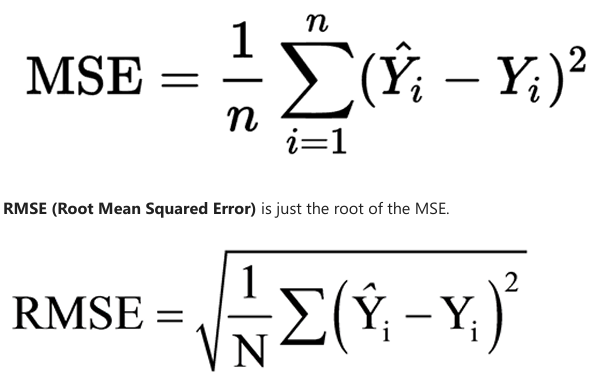

In [70]:
from math import sqrt
Y = 100 # Actual Value
YH = 94 # Predicted Value

# MSE Formula 
def MSE(Y, YH):
  return np.square(np.square(YH - Y).mean())

# RMSE formula
def RMSE(Y, YH):
  return sqrt(np.square(YH - Y).mean())
print('MSE: ', MSE(Y, YH))
print('RMSE: ', RMSE(Y, YH))

MSE:  1296.0
RMSE:  6.0


### Standord Error(SE)
The Standard Error (SE) measures how spread the distribution is from the sample
mean.
The formula can also be defined as the standard deviation divided by the square root
of the number of samples.

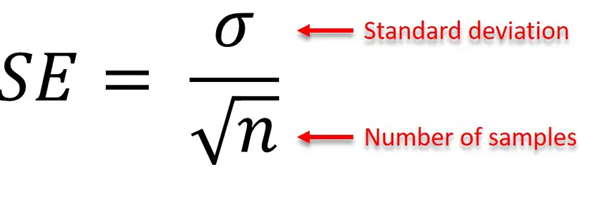

In [75]:
# Standard Error (SE)
uni_sample = uniform_dist.sample(100)
norm_sample = normal_dist.sample(100)
print('Standard Error of uniform sample: ', sem(uni_sample))
print('Standard Error of normal sample: ', sem(norm_sample))
# The random samples from the normal distribution should have a higher standaard error

Standard Error of uniform sample:  0.02861074503272314
Standard Error of normal sample:  0.09896196565529303


### Sampling Techniques
##### 1. Probability Sampling Methods.
*  **Simple Random Sampling:** Every individual in the population has an equal chance of being selected.
Selection is typically done using random number generators or random selection techniques.

* **Systematic Sampling:** Pick samples with a fixed interval. For example every 10th
 sample (0, 10, 20, etc.)
* **Stratified Sampling:** The population is divided into subgroups, or strata, that are different but share certain characteristics (such as age, gender, income, etc.).
Simple random sampling is then applied to each stratum, ensuring that each subgroup is properly represented in the sample.
* **Cluster Sampling:** The population is divided into clusters, often based on geography or other natural groupings.
A random sample of clusters is selected, and data is collected from all individuals within the chosen clusters.

##### 2. Non-Probability Sampling Methods
* **Convenience Sampling:** Sampling individuals who are easiest to access or available.
This is the least rigorous method and may lead to bias if the sample is not representative of the population.
* **Judgmental or Purposive Sampling:** The researcher selects individuals based on their judgment about who will provide the most useful information for the study.
This method is often used in qualitative research.
* **Quota Sampling:**
Similar to stratified sampling, but instead of random selection, individuals are selected non-randomly to fulfill quotas based on characteristics of the population..

In [101]:
# Note that we take very small samples just to illustrate the different sampli
print('---Non-Representative samples:---\n')

# Convenience samples
con_samples = normal_dist[0:5]
print('Convenience samples:\n\n{}\n'.format(con_samples))

# Jugdemental samples (Picking out some numbers)
hap_samples = [normal_dist[12], normal_dist[55], normal_dist[582], normal_dist]
print('Judgemental samples:\n\n{}\n'.format(hap_samples))
               
# Purposive samples (Pick samples for a specific purpose)
# In this example we pick the 5 highest values in our distribution
purp_samples = normal_dist.nlargest(n=5)
print('Purposive samples:\n\n{}\n'.format(purp_samples))
print('---Representative samples:---\n')

# Simple (pseudo)random sample
rand_samples = normal_dist.sample(5)
print('Random samples:\n\n{}\n'.format(rand_samples))

# Systematic sample (Every 2000th value)
sys_samples = normal_dist[normal_dist.index % 2000 == 0]
print('Systematic samples:\n\n{}\n'.format(sys_samples))

# Stratified Sampling
# We will get 1 person from every city in the dataset
# We have 8 cities so that makes a total of 8 samples
df = pd.read_csv('toy_dataset.csv')

strat_samples = []

for city in df['City'].unique():
    samp = df[df['City'] == city].sample(1)
    strat_samples.append(samp['Income'].item())
print('Stratified samples:\n\n{}\n'.format(strat_samples))
# Cluster Sampling
# Make random clusters of ten people (Here with replacement)
c1 = normal_dist.sample(10)
c2 = normal_dist.sample(10)
c3 = normal_dist.sample(10)
c4 = normal_dist.sample(10)
c5 = normal_dist.sample(10)

# Take sample from every cluster (with replacement)
clusters = [c1,c2,c3,c4,c5]

cluster_samples = []

for c in clusters:
    clus_samp = c.sample(1)
    cluster_samples.extend(clus_samp)
print('Cluster samples:\n\n{}'.format(cluster_samples))  

---Non-Representative samples:---

Convenience samples:

0    0.689914
1   -0.564698
2    0.901468
3    0.261318
4    1.594806
dtype: float64

Judgemental samples:

[-0.12139061065460738, -0.15240632179968605, 0.38394677059784166, 0       0.689914
1      -0.564698
2       0.901468
3       0.261318
4       1.594806
          ...   
9995   -0.952924
9996   -0.160907
9997   -0.538126
9998   -0.696180
9999    0.459056
Length: 10000, dtype: float64]

Purposive samples:

8533    3.689478
5245    3.628311
99      3.544486
4949    3.520119
5132    3.411387
dtype: float64

---Representative samples:---

Random samples:

7658    0.502428
6061    1.325617
6170    0.134965
835     0.661462
8051   -1.286955
dtype: float64

Systematic samples:

0       0.689914
2000    0.145292
4000    0.332879
6000    0.220606
8000   -2.623083
dtype: float64

Stratified samples:

[70708, 108424, 112275, 97981, 105856, 59306, 105610, 88817]

Cluster samples:

[-0.38294005440333867, 0.7606879153343383, -0.13423694581

### Covariance
Covariance is a measure of how much two random variables vary together. variance is
similar to covariance in that variance shows you how much one variable varies.
Covariance tells you how two variables vary together.
If two variables are independent, their covariance is 0. However, a covariance of 0 does
not imply that the variables are independent

In [105]:
# Covariance between Age and Income
print('Covariance between Age and Income: ')
df[['Age', 'Income']].cov()

Covariance between Age and Income: 


,Age,Income
Age,133.922426,-3.811863e+02
Income,-381.186341,6.244752e+08


### Correlation
 Correlation is a standardized version of covariance. Here it becomes more clear that
 Age and Income do not have a strong correlation in our dataset.
 The formula for Pearson's correlation coefficient consists of the covariance between the
 two random variables divided by the standard deviation of the first random vari

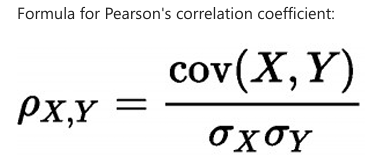able.

In [109]:
# Correlation between two normal distributions
# Using Pearson's correlation
print('Pearson: ')
print(df[['Age', 'Income']].corr(method='pearson'))

# Negatively correlated data
x1 = [1, 3, 3, 4, 6, 7, 7, 9, 10, 10]
x2 = [9.7, 9.3, 7, 6, 7, 7.2, 6, 4.2, 4.5, 4]

# Positively correlated data
y1 = [0, 1, 2, 2.3, 3, 4, 4, 7, 9, 9.5]
y2 = [2.2, 4, 3, 5, 5.3, 5, 7, 9, 5, 10]

# Correlation with NumPy
print('\nx1,x2 correlation: \n', np.corrcoef(x1, x2))
print('\ny1,y2 correlation: \n', np.corrcoef(y1, y2))

Pearson: 
             Age    Income
Age     1.000000 -0.001318
Income -0.001318  1.000000

x1,x2 correlation: 
 [[ 1.         -0.88237093]
 [-0.88237093  1.        ]]

y1,y2 correlation: 
 [[1.        0.7737071]
 [0.7737071 1.       ]]


### Linear regression
 Linear Regression can be performed through Ordinary Least Squares (OLS) or
 Maximum Likelihood Estimation (MLE).
 Most Python libraries use OLS to fit linear models.

 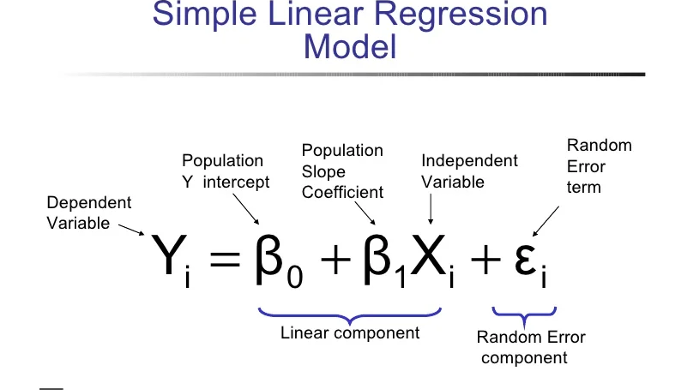

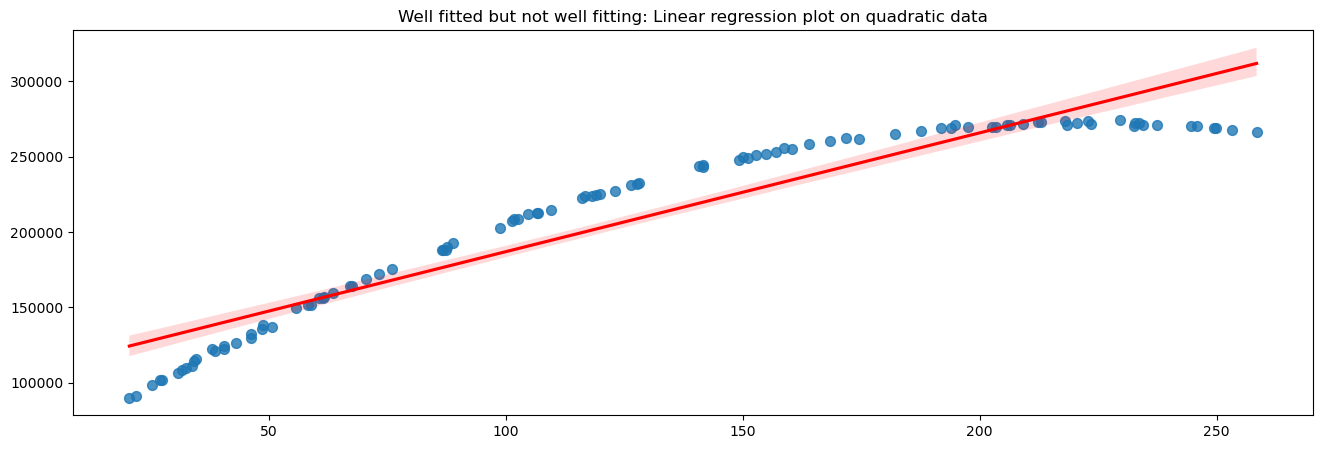

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate data
x = np.random.uniform(low=20, high=260, size=100)
y = 50000 + 2000*x - 4.5 * x**2 + np.random.normal(size=100, loc=0, scale=1000)

# Plot data with Linear Regression
plt.figure(figsize=(16,5))
plt.title('Well fitted but not well fitting: Linear regression plot on quadratic data')
sns.regplot(x=x, y=y, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.show()


 Here we observe that the linear model is well-fitted. However, a linear model is
 probably not ideal for our data, because the data follows a quadratic pattern. A
 polynomial regression model would better fit the data, but this is outside the scope of
 this tutorial.
 We can also implement linear regression with a bare-bones approach. In the following
 example we measure the vertical distance and horizontal distance between a random
 data point and the regression line

Slope: 5.1499997444767756
Intercept: -8.545219059616423


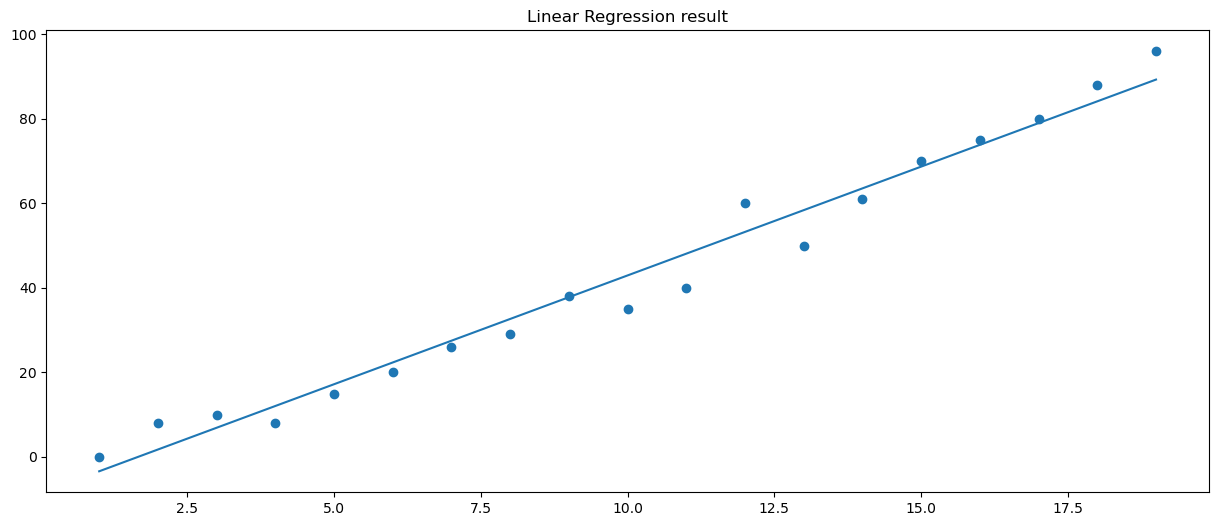

In [127]:
# Linear regression from scratch
import random

# Create data from regression
xs = np.array(range(1,20))
ys = [0,8,10,8,15,20,26,29,38,35,40,60,50,61,70,75,80,88,96]

# Put data in dictionary
data = dict()
for i in list(xs):
  data.update({xs[i-1] : ys[i-1]})
    
# Slope
m = 0
# y intercept
b = 0
# Learning rate
lr = 0.0001
# Number of epochs
epochs = 100000

# Formula for linear line
def lin(x):
  return m * x + b
    
# Linear regression algorithm
for i in range(epochs):
    # Pick a random point and calculate vertical distance and horizontal distance
    rand_point = random.choice(list(data.items()))
    vert_dist = abs((m * rand_point[0] + b) - rand_point[1])
    hor_dist = rand_point[0]
    if (m * rand_point[0] + b) - rand_point[1] < 0:
        # Adjust line upwards
        m += lr * vert_dist * hor_dist
        b += lr * vert_dist   
    else:
        # Adjust line downwards
        m -= lr * vert_dist * hor_dist
        b -= lr * vert_dist

# Plot data points and regression line
plt.figure(figsize=(15,6))
plt.scatter(data.keys(), data.values())
plt.plot(xs, lin(xs))
plt.title('Linear Regression result')  
print('Slope: {}\nIntercept: {}'.format(m, b))

###  Bootstrapping
 Bootstrapping is a resampling technique to quantify the uncertainty of an estimator
 given sample data. In other words, we have a sample of data and we take multiple
 samples from that sample. For example, with bootstrapping we can take means for
 each bootstrap sample and thereby make a distribution of means.
 Once we created a distribution of estimators we can use this to make decisions.

Bootstrapping can be:
 1. Non-parametric (Take random samples from sample)
 2. Parametric (Use the sample to create new datasets with a (normal) distribution
 which has sample mean and variance). Downside: You are making assumptions
 about the distribution. Upside: Computationally more light
 3. Online bootstrap (Take samples from a stream of data)
 The following code implements a simple non-parametric bootstrap to create a
 distribution of means, medians and midranges of the Income distribution in our Toy
 Dataset. We can use this to deduce which income means will make sense for
 subsequent samples.

Means of Bootstrap Samples: 
12495      51309
21178      87040
73025      96156
64711     102193
127056     51275
2988       44184
134958    106415
139996     78421
61145      93958
10568      33984
Name: Income, dtype: int64

Mean of the population:  91280.7568
Standard Deviation of the population:  25382.41238505708


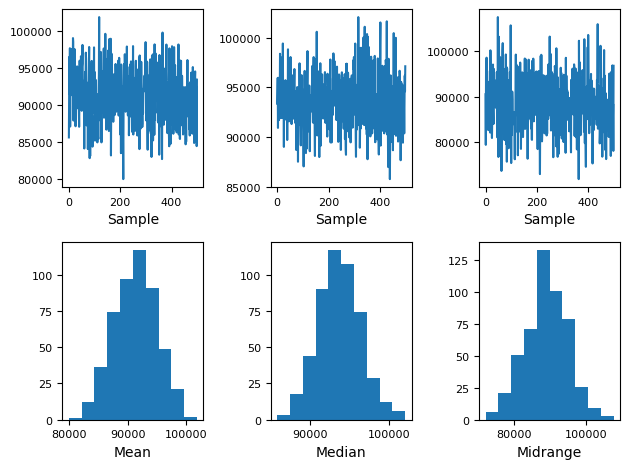

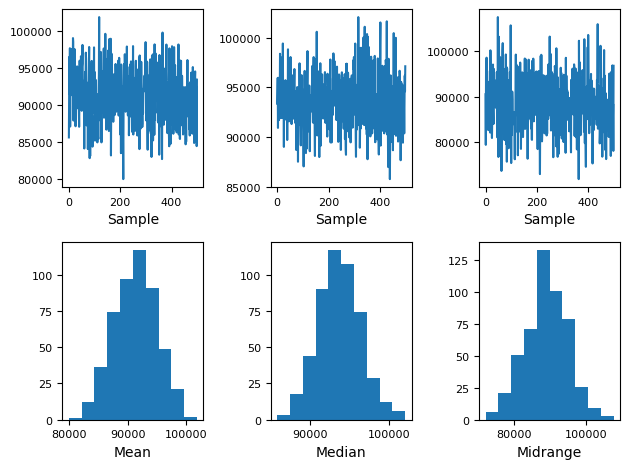

In [131]:
# scikit-learn bootstrap package
from sklearn.utils import resample

# data sample
data = df['Income'].sample(10000)

# prepare bootstrap samples
boot = resample(data, replace=True, n_samples=10, random_state=1)
print('Means of Bootstrap Samples: \n{}\n'.format(boot))
print('Mean of the population: ', data.mean())
print('Standard Deviation of the population: ', data.std())

# Bootstrap plot
pd.plotting.bootstrap_plot(data)

###  Hypothesis testing
We establish two hypotheses, H0 (Null hypothesis) and Ha (Alternative Hypothesis).
We can make four different decisions with hypothesis testing:
1. Reject H0 and H0 is not true (no error)
2. Do not reject H0 and H0 is true (no error)
3. Reject H0 and H0 is true (Type 1 Error)
4. Do not reject H0 and H0 is not true (Type 2 error)
Type 1 error is also called Alpha error. Type 2 error is also called Beta error.
 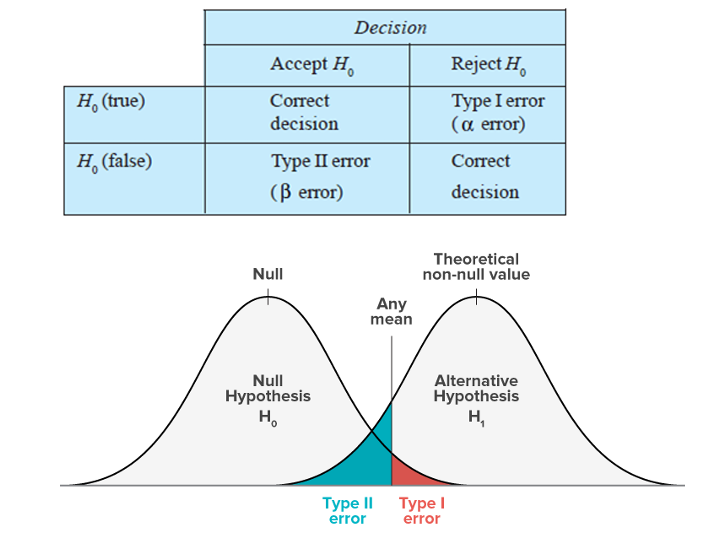

### P-Value
A p-value is the probability of finding equal or more extreme results when the null  hyptohesis (H0) is true. In other words, a low p-value means tha  we have compellin 
 evidence to reject the null hypothesi

s
 If the p-value is lower than 5% (p < 0.05). We often reject H0 and accept Ha is true. e
 say that p < 0.05 is statistically significant, bec use there is less than 5% chance tha we
 are wrong in rejecting the null hypoth

eis.
 One way to calculate the p-value is through a T-test. We can use Scipy's tte _ind
 function to calculate the t-test for the means of two independent samples of sco s. In
 this example we calculate the t-statistic and p-value of two random samples 1

0times.
 We see that the p-value is sometimes very low, but this does not mean that  ese two
 random samples are correlated. This is why you  ave to be careful with r ying too
 heavily of p-values. If you repeat an experiment multiple times you can get rapped in
 the illusion that there is correlation where there is only randomness.

In [142]:
# Perform t-test and compute p value of two random samples
print('T-statistics and p-values of two random samples.')
for _ in range(10):
    rand_sample1 = np.random.random_sample(10)
    rand_sample2 = np.random.random_sample(10)
    print(stats.ttest_ind(rand_sample1, rand_sample2))

T-statistics and p-values of two random samples.
TtestResult(statistic=0.14947206274537553, pvalue=0.882843166675681, df=18.0)
TtestResult(statistic=-0.2416011019761251, pvalue=0.8118202031760777, df=18.0)
TtestResult(statistic=-0.035029924064382725, pvalue=0.9724414263254327, df=18.0)
TtestResult(statistic=0.15714056066822205, pvalue=0.8768832950291913, df=18.0)
TtestResult(statistic=-0.11756297607115392, pvalue=0.9077158435712848, df=18.0)
TtestResult(statistic=0.3207688995143835, pvalue=0.75207971961896, df=18.0)
TtestResult(statistic=-0.9388729949522003, pvalue=0.3602247368936029, df=18.0)
TtestResult(statistic=-0.20653353416396525, pvalue=0.8386923950083295, df=18.0)
TtestResult(statistic=1.0438421425290507, pvalue=0.3103754778081123, df=18.0)
TtestResult(statistic=-0.37012880798409137, pvalue=0.71560573620577, df=18.0)


###  q-q plot (quantile-quantile plot)
 Many statistical techniques require that data is coming from a normal distribution (for
 example, t-test). Therefore, it is important to verify this before applying statistical
 techniques.

 
 One approach is to visualize and make a judgment about the distribution. A q-q plot is
 very helpful for determining if a distribution is normal. There are other tests for testing
 'normality', but this is beyond the scope of this tutorial.

 
 In the first plot we can easily see that the values line up nicely. From this we conclude
 that the data is normally distributed.
 In the second plot we can see that the values don't line up. Our conclusion is that the
 data is not normally distributed. In this case the data was uniformly distributed.

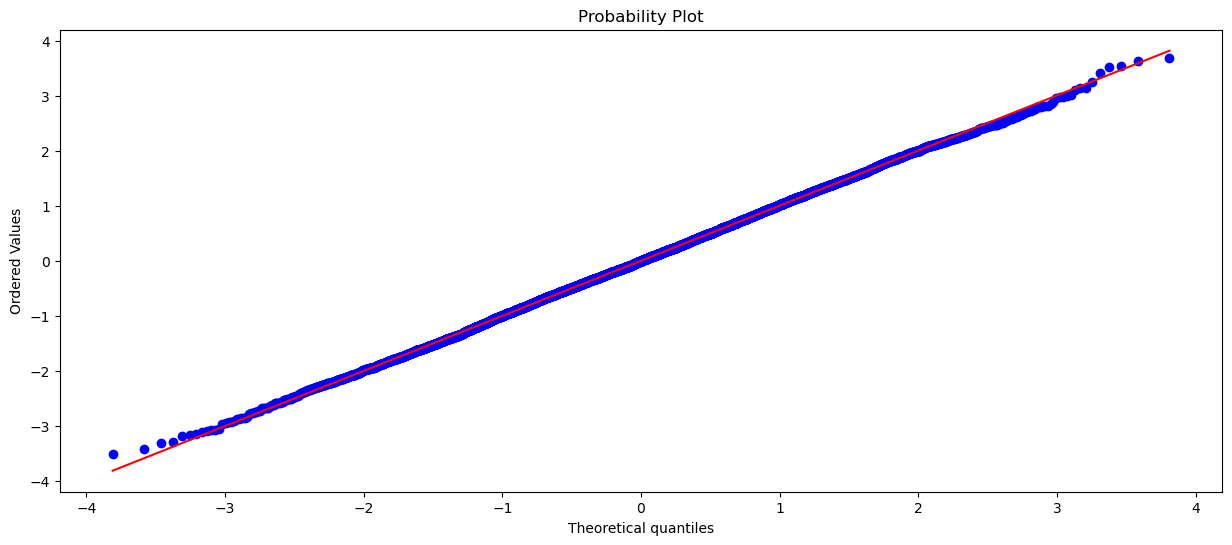

In [147]:
# q-q plot of a normal distribution
plt.figure(figsize=(15,6))
stats.probplot(normal_dist, dist="norm", plot=plt)
plt.show()

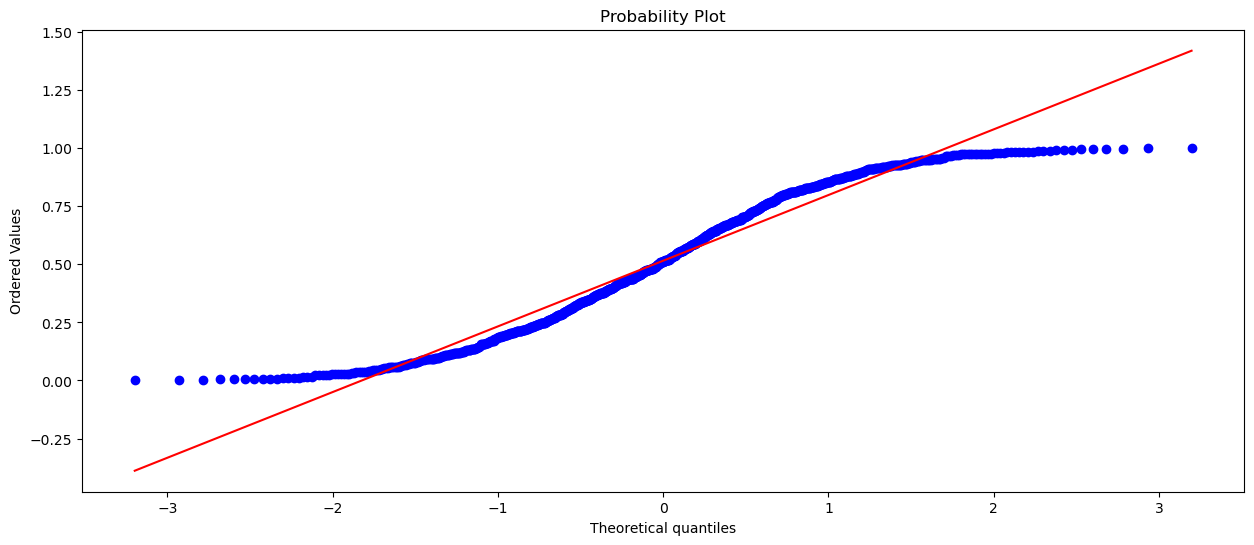

In [149]:
# q-q plot of a uniform/random distribution
plt.figure(figsize=(15,6))
stats.probplot(uniform_dist, dist="norm", plot=plt) 
plt.show()

 ### Outliers
 An outlier is an observation which deviates from other observations. An outlier often
 stands out and could be an error.

 
 Outliers can mess up you statistical models. However, outliers should only be removed
 when you have established good reasons for removing the outlier.

 
 Sometimes the outliers are the main topic of interest. This is for example the case with
 fraud detection. There are many outlier detection methods, but here we will discuss
 Grubbs test and Tukey’s method. Both tests assume that the data is normally
 distributed.

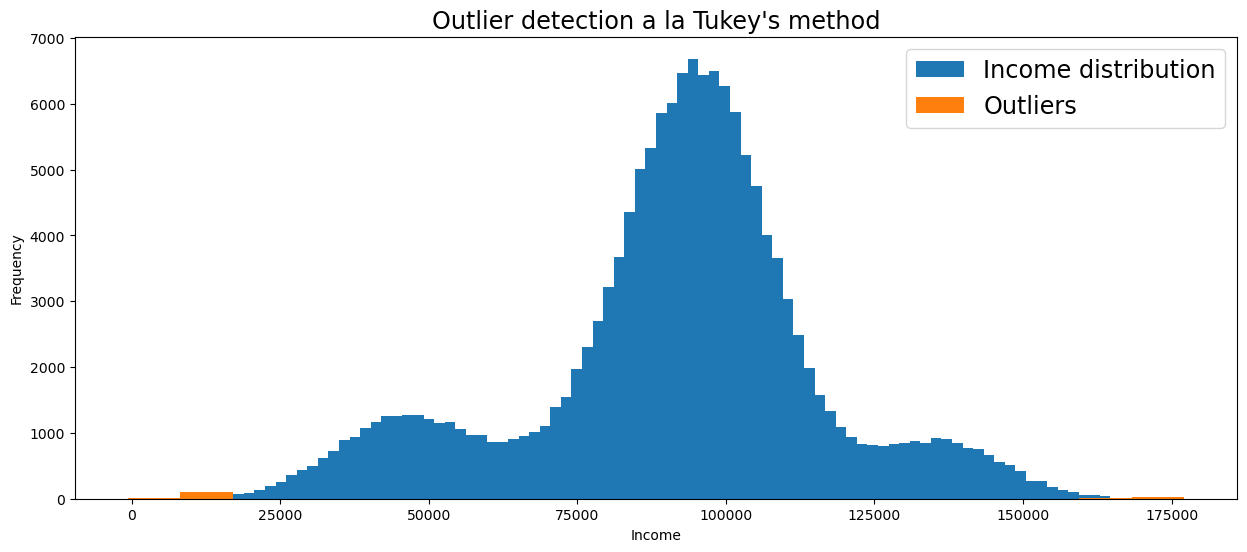

In [154]:
# Detect outliers on the 'Income' column of the Toy Dataset
# Function for detecting outliers a la Tukey's method using z-scores
def tukey_outliers(data) -> list:
    
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    # Spot and collect outliers
    outliers = []
    for i in data:
      z_score = (i - mean) / std
      if abs(z_score) > threshold:
           outliers.append(i)
    return outliers
    
# Get outliers
income_outliers = tukey_outliers(df['Income'])
# Visualize distribution and outliers
plt.figure(figsize=(15,6))
df['Income'].plot(kind='hist', bins=100, label='Income distribution')
plt.hist(income_outliers, bins=20, label='Outliers')
plt.title("Outlier detection a la Tukey's method", fontsize='xx-large')
plt.xlabel('Income')
plt.legend(fontsize='xx-large')
plt.show()

 ### Overfitting
 Our model is overfitting if it is also modeling the 'noise' in the data. This implies that
 the model will not generalize well to new data even though the error on the training
 data becomes very small. Linear models are unlikely to overfit, but as models become
 more flexible we have to be wary of overfitting. Our model can also underfit which
 means that it has a large error on the training data.

 
 Finding the sweet spot between overfitting and underfitting is called the Bias Variance
 Trade-off. It is nice to know this theorem, but more important to understand how to
 prevent it. I will explain some techniques for how to do this below.

#### Prevention of Overfitting
 1. Split data into training data and test data.
 2. Regularization: limit the flexibility of the model.
 3. Cross Validation

### Cross Validation
 Cross validation is a technique to estimate the accuracy of our statistical model. It is
 also called out-of-sample testing or rotation estimation. Cross validation will help us to
 recognize overfitting and to check if our model generalizes to new (out-of-sample)
 d

 ata.
 A popular cross validation technique is called k-fold cross validation. The idea is simple,
 we split our dataset up in k datasets and out of each dataset k we pick out a few
 samples. We then fit our model on the rest of k and try to predict the samples we
 picked out. We use a metric like Mean Squared Error to estimate how good our
 predictions are. This procedure is repeated and then we look at the average of the
 predictions over multiple cross-validation 

 data sets.
 A special case where we pick out one samples is called 'Leave-One-Out Cross
 Validation (LOOCV)'. However, the variance of L.OOCV is high